# Calculate URI
This notebook runs the jupyter notebook for 1 or more hazard.

## Settings

In [1]:
import URI.MISC.utils_1 as utils
#import URI.MISC.params_1 as params
import URI.CALCULATE.ESL_Calculate_1 as ESL_Calculate
import URI.CALCULATE.SOV_Calculate_1 as SOV_Calculate
import URI.CALCULATE.RCA_Calculate_1 as RCA_calculate
import URI.CALCULATE.URI_Calculate_1 as URI_Calculate
import URI.CALCULATE.ALL_Calculate_1 as ALL_Calculate
import URI.CALCULATE.UPSCALE_Calculate_1 as UPSCALE_Calculate
import URI.CALCULATE.ABS_Calculate_1 as ABS_Calculate
import URI.CALCULATE.CSV_Calculate as CSV_Calculate
utils.set_home()
import warnings
warnings.filterwarnings(action='ignore')

# list hazards to run
# to run all hazards enter: list_haz = ['EXH', 'WIW', 'CST', 'CER', 'CYB', 'RES', 'EMG', 'CRN', 'HIW', 'ERQ', 'FLD']

# abbreviations:
# EXH: extreme heat
# WIW: winter weather
# CST: coastal storms
# CER: coastal erosion
# CYB: cyber threats
# RES: respiratory diseases
# EMG: emerging diseases
# CRN: chemical, biological, radiological, and nuclear
# HIW: high wind
# ERQ: earthquake
# FLD: flood

#edit this line with the hazards you wish to run
list_haz = ['EXH', 'WIW', 'CST', 'CER', 'CYB', 'RES', 'EMG', 'CRN', 'HIW', 'ERQ', 'FLD']

#do not change this
list_haz_with_ALL = list_haz + ['ALL']    #add all as hazard


## 1. Calculate ESL

Calculating ESL...

Calculating EXH
.....Importing EXH expected annual losses.....
 
..........Factor:  Mortality
..........Abbreviation:  D
..........Receptor:  People
..........Category:  Mortality Loss
 


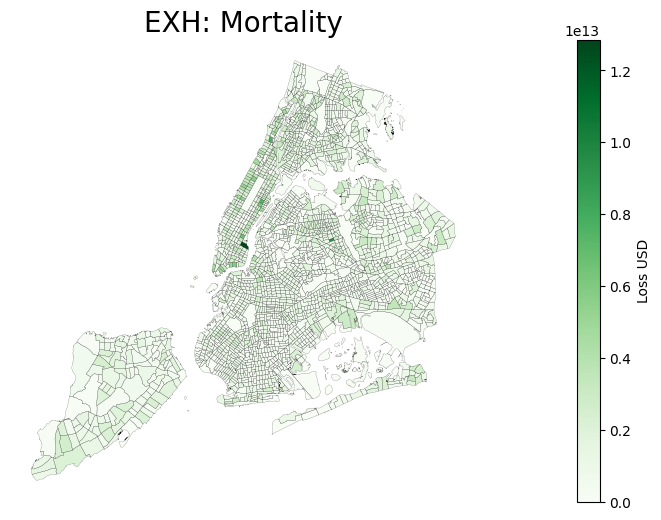

..........Factor:  Morbidity
..........Abbreviation:  I
..........Receptor:  People
..........Category:  Morbidity Loss
 


ValueError: You are trying to merge on object and int64 columns for key 'BCT_txt'. If you wish to proceed you should use pd.concat

In [2]:
print("Calculating ESL...\n")
for haz in list_haz:
    ESL_Calculate.calculate_ESL(haz)
    

## 2. Calculate SOV

In [ ]:
print("Calculating SOV....\n")
SOV_Calculate.calculate_SOV()


## 3. Calculate RCA

In [ ]:
print("Calculating RCA....\n")
for haz in list_haz:
    RCA_calculate.calculate_RCA(haz)
    

Calculating RCA....



DataSourceError: .\2_PROCESSED_INPUTS\901_RCA_CC_CI_SCORE\RCA_CC_community_infrastructure_score.shp: No such file or directory

## 4. Calculate URI

In [ ]:
print("Calculating URI....\n")
for haz in list_haz:
    URI_Calculate.calculate_URI(haz)
    

## 5. Calculate URI - All Hazards

In [ ]:
print("Calculating all-hazards URI....\n")
ALL_Calculate.calculate_ALL(list_haz)


## 6. Calculate Upscaled Geographies

In [ ]:
print("Calculating upscaled geographies....\n")
for haz in list_haz_with_ALL:
    UPSCALE_Calculate.calculate_UPSCALE(haz)
    

## 7. Calculate URI - Absolute

In [ ]:
print("Calculating absolute URI....\n")
ABS_Calculate.calculate_ABS(list_haz)


## 8. Create Tables

In [ ]:
import importlib
importlib.reload(CSV_Calculate)
print("Creating tables URI....\n")
list_geographies = ['CITYWIDE', 'borocode', 'cdta2020', 'nta2020', 'BCT_txt']
path_output = params.PATHNAMES.at['TBL_output_csv', 'Value']
CSV_Calculate.calculate_csv(list_haz_with_ALL, list_geographies, path_output)
